# Estimasi Harga Laptop

# Business Understanding

Laptop merupakan salah satu alat penunjang kegiatan yang paling sering digunakan dalam pekerjaan sehari - hari. Ada banyak tipe dan jenis laptop tergantung kebutuhan masing - masing. Harga dari setiap laptop pun berbeda - beda tergantung spesifikasi yang dibutuhkan. Hal itulah yang menjadi dasar untuk tujuan disini, yaitu untuk menentukan estimasi harga laptop yang ada dipasaran agar dapat membantu calon pengguna dalam mendapatkan laptop yang sesuai dengan kebutuhannya.

# Data Understanding

Dari file laptop_price.csv terdapat 11 kolom yang yang tipe datanya float dan object
 
 0   Company           1303 non-null   object 

 1   TypeName          1303 non-null   object 
 
 2   Inches            1303 non-null   float64
 
 3   ScreenResolution  1303 non-null   object 
 
 4   Cpu               1303 non-null   object 
 
 5   Ram               1303 non-null   object 
 
 6   Memory            1303 non-null   object 
 
 7   Gpu               1303 non-null   object 
 
 8   OpSys             1303 non-null   object 
 
 9   Weight            1303 non-null   object 
 
 10  Price_euros       1303 non-null   float64

# Data Preparation

Pada tahap ini data akan dibersihkan terlebih dahulu agar data dapat digunakan sebagai input dari aplikasi yang akan dibuat 

- Deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Memanggil dataset

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

- Deskripsi dataset

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Menghapus kolom product

df.drop(columns=['Product'],inplace=True)


In [5]:
# Info mengenai tipe data yang ada di tabel

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Karena ada beberapa kolom dengan tipe data object, maka akan diubah terlebih dahulu

In [6]:
# Mengubah nama kolom

df.rename(columns = {'Ram':'Ram_GB'}, inplace = True)
df.rename(columns = {'Weight':'Weight_KG'}, inplace = True)

In [7]:
# Mengganti tipe data menjadi int dan float dan menghapus "kg" "GB" 

df['Weight_KG'] = df['Weight_KG'].str.replace('kg','')
df['Ram_GB'] = df['Ram_GB'].str.replace('GB','')

df["Ram_GB"] = df["Ram_GB"].astype(int)
df["Weight_KG"] = df["Weight_KG"].astype(float)

df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram_GB            1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight_KG         1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 117.2+ KB


In [9]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Pada kolom ScreenResolution ada beberapa fitur yang tertulis seperti touchscreen dan layar IPS, maka akan dibuat kolom baru yaitu kolom Touchscreen dan kolom IPS

In [10]:
# Membuat kolom Touchscreen

df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# 1 = Touchscreen
# 0 = No Touchscreen

df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen
517,524,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,2968.0,0
778,787,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,2899.0,0
84,86,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,395.0,0
604,611,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18,465.0,0
1230,1248,Lenovo,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1650.0,1


In [11]:
# Membuat kolom IPS

df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

# 1 = Touchscreen
# 0 = No Touchscreen

df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS
283,288,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,579.0,0,0
1007,1021,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,1449.0,0,0
311,316,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21,2499.0,1,1
451,458,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD,Nvidia Quadro M620,Windows 10,2.17,1975.0,0,1
877,888,Xiaomi,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28,935.0,0,1


In [12]:
# Merapikan kolom ScreenResolution

df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS
1187,1205,Acer,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.23,691.00,0,0
581,588,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,1008.52,0,0
309,314,HP,Notebook,15.6,1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.86,469.00,0,0
252,257,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68,469.00,0,0
561,568,Lenovo,Notebook,15.6,1920x1080,Intel Core i3 7130U 2.7GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.05,630.00,0,0


In [13]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

Karena ada banyak jenis Cpu, maka akan dibuat kolom baru yang berisi tipe Cpu apa yang digunakan, yaitu kolom Cpu_Name dan Cpu_Brand, dimana nanti kita akan menggunakan kolom Cpu_Brand kedepannya

In [14]:
# Membuat kolom Cpu_Name

df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [15]:
# Fungsi yang memilah Cpu

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
df['Cpu_Brand']=df['Cpu_Name'].apply(fetch_processor)

df.sample(7)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Name,Cpu_Brand
84,86,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,395.00,0,0,AMD A9-Series 9420,AMD Processor
787,796,Lenovo,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,4,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,999.00,0,1,Intel Core i7,Intel Core i7
778,787,Razer,Gaming,14.0,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,2899.00,0,0,Intel Core i7,Intel Core i7
1211,1229,Asus,Notebook,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,1749.00,0,0,Intel Core i7,Intel Core i7
93,95,Dell,Gaming,15.6,1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,1195.00,0,0,Intel Core i5,Intel Core i5
1169,1187,MSI,Gaming,15.6,1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,839.00,0,1,Intel Core i7,Intel Core i7
42,43,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,522.99,0,0,Intel Core i5,Intel Core i5


In [16]:
# Menghapus kolom Cpu dan Cpu_Name

df.drop(columns=['Cpu','Cpu_Name'],inplace=True)

df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand
1172,1190,Asus,Notebook,15.6,1366x768,4,500GB HDD,Intel HD Graphics,Windows 10,2.200,369.0,0,0,Other Intel Processor
978,992,HP,Notebook,15.6,1366x768,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.040,579.0,0,0,Intel Core i7
8,9,Asus,Ultrabook,14.0,1920x1080,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.300,1495.0,0,0,Intel Core i7
1275,1293,Asus,Ultrabook,13.3,1920x1080,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.200,729.0,0,1,Other Intel Processor
104,107,Microsoft,Ultrabook,13.5,2256x1504,8,256GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,1340.0,1,0,Intel Core i5


In [17]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [18]:
# Menghapus kolom memori

df.drop(columns=['Memory'],inplace=True)

In [19]:
# Menghapua kolom Hybrid dan Flash Storage

df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [20]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

Selanjutnya data Gpu akan diolah menjadi 3 kategori berdasarkan merknya  

In [21]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [22]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand,HDD,SSD,Gpu brand
210,215,Acer,Notebook,15.6,1920x1080,8,Nvidia GeForce GTX 1050,Linux,2.40,779.0,0,0,Intel Core i7,1000,0,Nvidia
754,763,Asus,Notebook,15.6,1366x768,4,Intel HD Graphics 620,Windows 10,2.37,849.9,0,0,Intel Core i7,0,256,Intel
886,897,Dell,Notebook,15.6,1366x768,4,AMD Radeon R5 M420X,Linux,2.18,455.7,0,0,Intel Core i3,1000,0,AMD
198,202,HP,Gaming,17.3,1920x1080,16,Nvidia GeForce GTX 1050,Windows 10,3.35,1379.0,0,1,Intel Core i7,1000,256,Nvidia
345,351,Lenovo,Gaming,15.6,1920x1080,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,1129.0,0,1,Intel Core i7,2000,256,Nvidia


In [23]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [24]:
# Menghapus Gpu Merk ARM karena hanya ada satu

df = df[df['Gpu brand'] != 'ARM']


In [25]:
# Menghapus kolom Gpu 

df.drop(columns=['Gpu'],inplace=True)

In [26]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Selanjutnya akan dibuat fungsi untuk memilah sistem operasi apa yang digunakan oleh laptop

In [27]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [28]:
df['OS'] = df['OpSys'].apply(cat_os)


In [29]:
# Menghapus kolom OpSys (dan diganti menjadi kolom OS)

df.drop(columns=['OpSys'],inplace=True)

In [30]:
df.sample(5)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram_GB,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand,HDD,SSD,Gpu brand,OS
922,936,HP,Ultrabook,13.3,3200x1800,8,1.39,1149.0,1,0,Intel Core i7,0,256,Intel,Windows
593,600,Samsung,Notebook,15.6,1920x1080,16,2.50,1699.0,0,0,Intel Core i7,1000,128,Nvidia,Windows
282,287,Lenovo,Gaming,15.6,1920x1080,8,2.50,829.0,0,1,Intel Core i5,0,256,Nvidia,Windows
96,98,Dell,Notebook,15.6,1920x1080,8,2.20,599.9,0,0,Intel Core i7,1000,0,AMD,Others/No OS/Linux
710,718,Lenovo,Gaming,15.6,1920x1080,8,2.50,1249.0,0,1,Intel Core i7,1000,128,Nvidia,Windows


# Modelling

<Axes: >

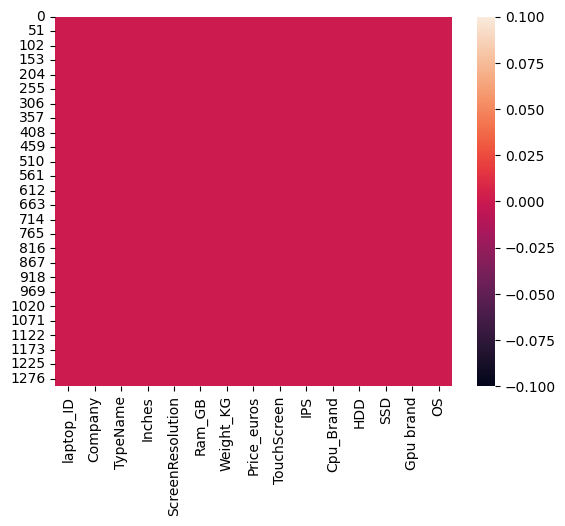

In [31]:
sns.heatmap(df.isnull())

In [32]:
df.describe()

,laptop_ID,Inches,Ram_GB,Weight_KG,Price_euros,TouchScreen,IPS,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,659.734255,15.019278,8.385561,2.039416,1124.043894,0.146697,0.27957,414.101382,183.874040
std,381.014613,1.424861,5.085166,0.665274,699.158856,0.353940,0.44896,515.889348,186.969314
min,1.000000,10.100000,2.000000,0.690000,174.000000,0.000000,0.00000,0.000000,0.000000
25%,331.250000,14.000000,4.000000,1.500000,599.000000,0.000000,0.00000,0.000000,0.000000
50%,658.500000,15.600000,8.000000,2.040000,978.000000,0.000000,0.00000,0.000000,256.000000
75%,989.750000,15.600000,8.000000,2.300000,1488.435000,0.000000,1.00000,1000.000000,256.000000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000,1.000000,1.00000,2000.000000,1024.000000


- Visualisasi Data

<Axes: >

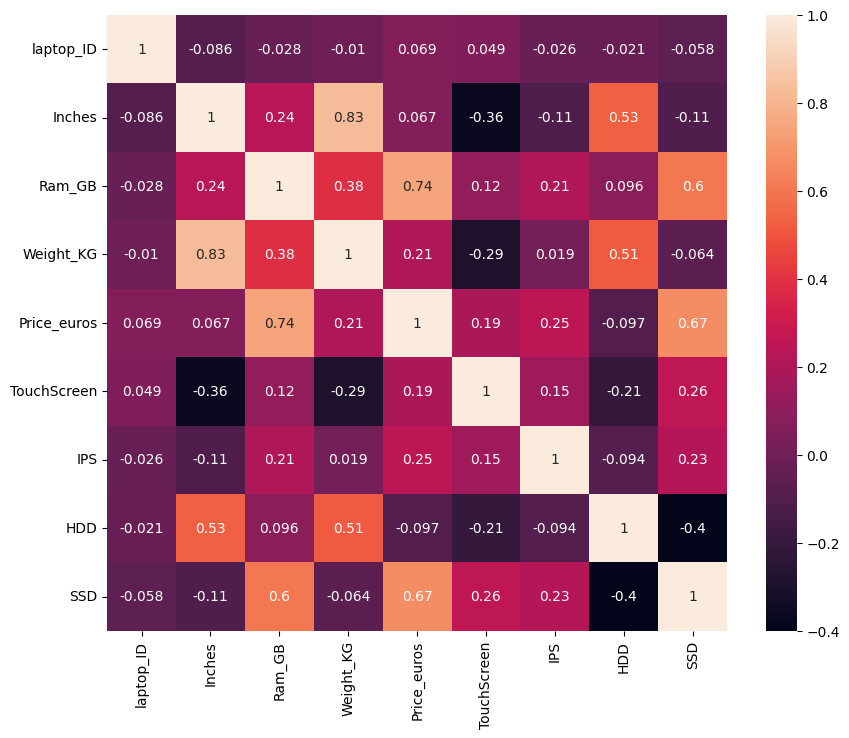

In [34]:
numerical_columns = df.select_dtypes(include=[np.number])
correlation = numerical_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(numerical_columns.corr(),annot=True)

- Jumlah laptop berdasarkan merk

In [36]:
Merk = df.groupby('Company').count()[['Price_euros']].sort_values(by='Price_euros',ascending=True).reset_index()
Merk = Merk.rename(columns={'Price_euros':'numberOfLaptops'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Huawei'),
  Text(1, 0, 'LG'),
  Text(2, 0, 'Chuwi'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Fujitsu'),
  Text(5, 0, 'Vero'),
  Text(6, 0, 'Xiaomi'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Mediacom'),
  Text(9, 0, 'Razer'),
  Text(10, 0, 'Samsung'),
  Text(11, 0, 'Apple'),
  Text(12, 0, 'Toshiba'),
  Text(13, 0, 'MSI'),
  Text(14, 0, 'Acer'),
  Text(15, 0, 'Asus'),
  Text(16, 0, 'HP'),
  Text(17, 0, 'Lenovo'),
  Text(18, 0, 'Dell')])

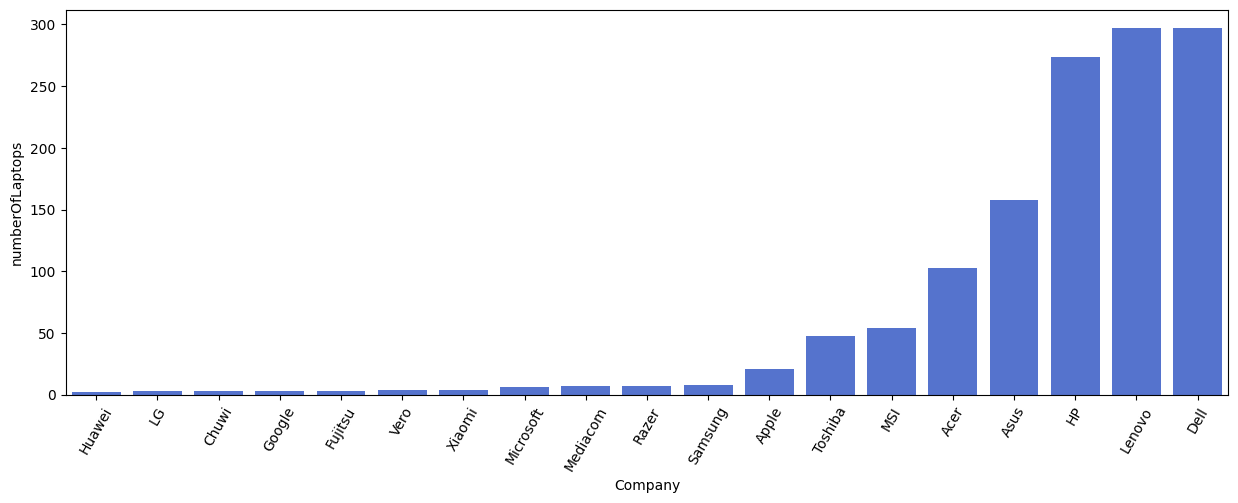

In [37]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Merk['Company'], y=Merk['numberOfLaptops'], color='royalblue')
plt.xticks(rotation=60)

- Jumlah laptop berdasarkan memori HDD

In [38]:
Memori= df.groupby('HDD').count()[['Price_euros']].sort_values(by='Price_euros').reset_index()
Memori = Memori.rename(columns={'Price_euros':'count'})

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '32'),
  Text(2, 0, '128'),
  Text(3, 0, '500'),
  Text(4, 0, '1000'),
  Text(5, 0, '2000')])

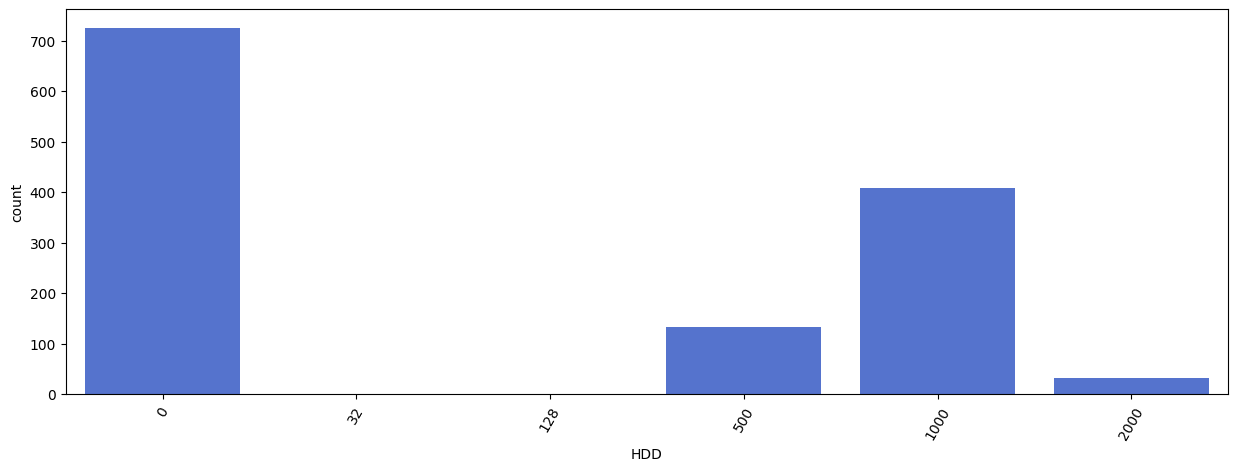

In [39]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Memori['HDD'], y=Memori['count'], color='royalblue')
plt.xticks(rotation=60)

- Jumlah laptop berdasarkan memori SSD

In [40]:
Memori= df.groupby('SSD').count()[['Price_euros']].sort_values(by='Price_euros').reset_index()
Memori = Memori.rename(columns={'Price_euros':'count'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '8'),
  Text(2, 0, '16'),
  Text(3, 0, '32'),
  Text(4, 0, '64'),
  Text(5, 0, '128'),
  Text(6, 0, '180'),
  Text(7, 0, '240'),
  Text(8, 0, '256'),
  Text(9, 0, '512'),
  Text(10, 0, '768'),
  Text(11, 0, '1000'),
  Text(12, 0, '1024')])

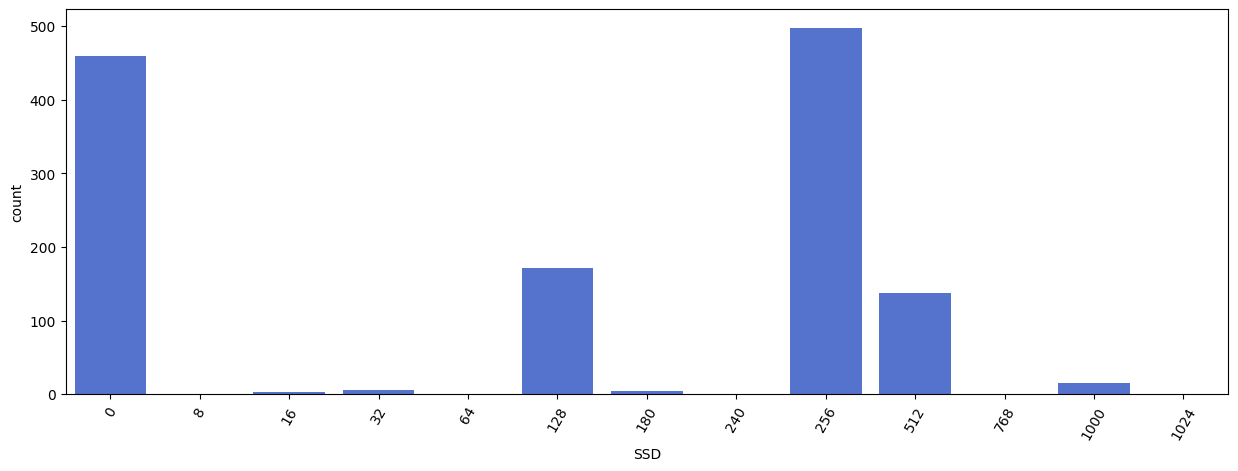

In [41]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Memori['SSD'], y=Memori['count'], color='royalblue')
plt.xticks(rotation=60)

- Distribusi SSD

C:\Users\Itsna Maulana\AppData\Local\Temp\ipykernel_7040\2738201030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ram_GB'])


<Axes: xlabel='Ram_GB', ylabel='Density'>

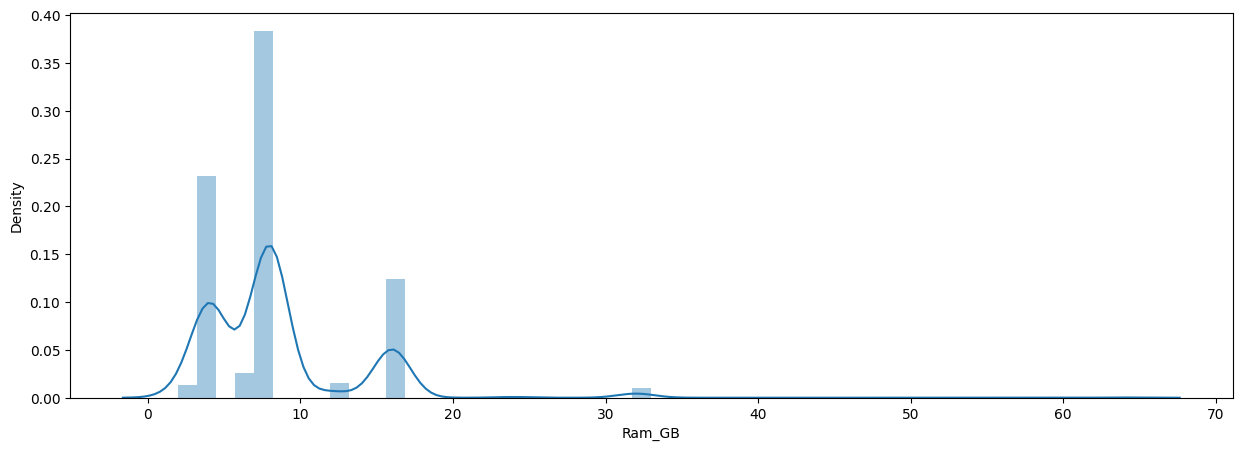

In [42]:
plt.figure(figsize=(15,5))
sns.distplot(df['Ram_GB'])

- Distribusi harga

C:\Users\Itsna Maulana\AppData\Local\Temp\ipykernel_7040\178916287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

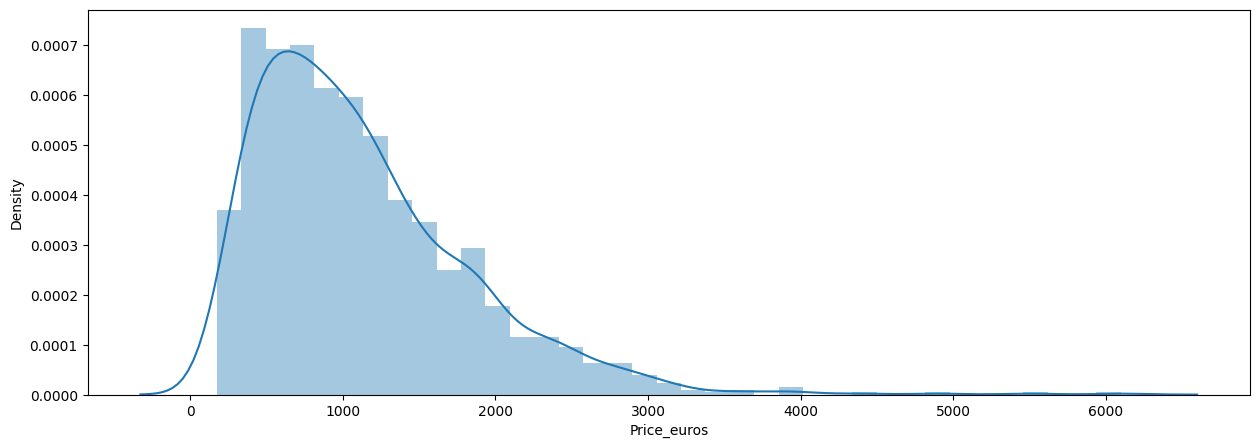

In [43]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price_euros'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   TypeName          1302 non-null   object 
 3   Inches            1302 non-null   float64
 4   ScreenResolution  1302 non-null   object 
 5   Ram_GB            1302 non-null   int32  
 6   Weight_KG         1302 non-null   float64
 7   Price_euros       1302 non-null   float64
 8   TouchScreen       1302 non-null   int64  
 9   IPS               1302 non-null   int64  
 10  Cpu_Brand         1302 non-null   object 
 11  HDD               1302 non-null   int64  
 12  SSD               1302 non-null   int64  
 13  Gpu brand         1302 non-null   object 
 14  OS                1302 non-null   object 
dtypes: float64(3), int32(1), int64(5), object(6)
memory usage: 157.7+ KB


- Seleksi Fitur

In [45]:
features = ['Ram_GB','Weight_KG','TouchScreen','IPS', 'HDD', 'SSD']
x = df[features]
y = df['Price_euros']
x.shape, y.shape

((1302, 6), (1302,))

- Split data training dan data testing

In [46]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(326,)

- Membuat model regresi linier

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)


In [48]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.6285673096011863


# Evaluation

- Membuat inputan model regresi linier


In [49]:
#['Ram(GB)','Weight(KG)','TouchScreen','IPS', 'HDD', 'SSD']
input_data = np.array([[8,15.4,0,1,0,512]])

prediction = lr.predict(input_data)
print('Estimasi harga Laptop dalam euro :', prediction)

Estimasi harga Laptop dalam euro : [2679.96393882]


c:\users\itsna maulana\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- Save model

In [50]:
import pickle

filename = 'estimasi_harga_laptop.sav'
pickle.dump(lr,open(filename,'wb'))